In [61]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

In [62]:
data = pd.read_csv('data/Train_UWu5bXk.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

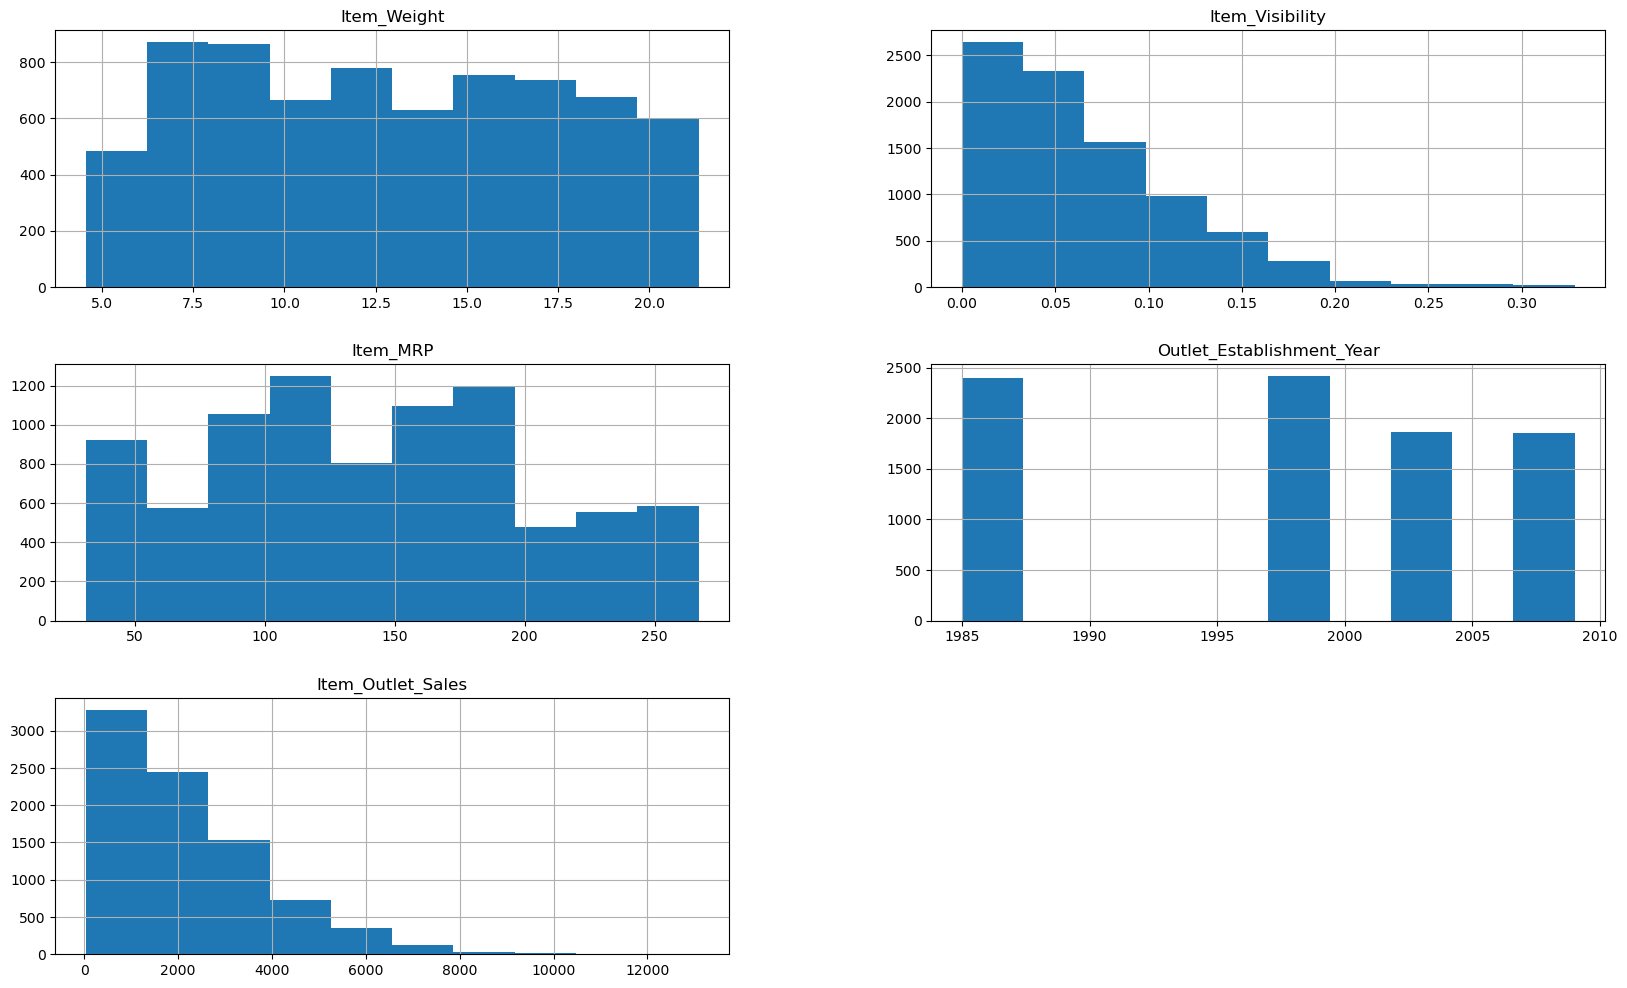

In [63]:
data.hist(figsize=(20, 12))

In [83]:
x = data[['Item_Weight',	'Item_Fat_Content',	'Item_Visibility',	'Item_Type', 'Item_MRP', 'Outlet_Identifier' ,'Outlet_Establishment_Year', 'Outlet_Size' ,'Outlet_Location_Type' ,'Outlet_Type']]
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [84]:
temp = x.copy()
cont_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
scaler = StandardScaler()
temp = temp[cont_cols]
x_scaled = scaler.fit_transform(temp)

In [85]:
x_scaled

array([[-0.7662174 , -0.97073217,  1.74745381,  0.13954076],
       [-1.49417499, -0.90811123, -1.48902325,  1.33410274],
       [ 0.99983356, -0.95691733,  0.01004021,  0.13954076],
       ...,
       [-0.48623371, -0.59978449, -0.89720755,  0.73682175],
       [-1.21634502,  1.53287976, -0.60797692,  1.33410274],
       [ 0.41832897, -0.41193591, -1.05226104, -0.09937163]])

In [86]:
x[cont_cols] = x_scaled

C:\Users\saleh\AppData\Local\Temp\ipykernel_2648\1393451540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[cont_cols] = x_scaled


In [87]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.766217,Low Fat,-0.970732,Dairy,1.747454,OUT049,0.139541,Medium,Tier 1,Supermarket Type1
1,-1.494175,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,1.334103,Medium,Tier 3,Supermarket Type2
2,0.999834,Low Fat,-0.956917,Meat,0.010040,OUT049,0.139541,Medium,Tier 1,Supermarket Type1
3,1.365966,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,0.020085,NaN,Tier 3,Grocery Store
4,-0.845905,Low Fat,-1.281758,Household,-1.399220,OUT013,-1.293934,High,Tier 3,Supermarket Type1


In [88]:
y = data['Item_Outlet_Sales']

In [89]:
cat_cols_indexes = [1, 3, 5, 7, 8, 9]

In [90]:
x.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [91]:
x['Outlet_Size'].fillna(x['Outlet_Size'].mode()[0], inplace=True)

C:\Users\saleh\AppData\Local\Temp\ipykernel_2648\528626713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Outlet_Size'].fillna(x['Outlet_Size'].mode()[0], inplace=True)


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=2323)

In [93]:
model = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=8, eval_metric='MAE')

In [96]:
model.fit(x_train, y_train, cat_cols_indexes, eval_set=(x_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1278.2458711	test: 1241.7101649	best: 1241.7101649 (0)	total: 30.9ms	remaining: 9.23s
1:	learn: 1210.2324489	test: 1175.4775526	best: 1175.4775526 (1)	total: 97.1ms	remaining: 14.5s
2:	learn: 1151.3387272	test: 1118.8160459	best: 1118.8160459 (2)	total: 161ms	remaining: 15.9s
3:	learn: 1099.7832621	test: 1069.3356349	best: 1069.3356349 (3)	total: 198ms	remaining: 14.6s
4:	learn: 1052.7993523	test: 1023.7610546	best: 1023.7610546 (4)	total: 241ms	remaining: 14.2s
5:	learn: 1014.9555181	test: 987.4871287	best: 987.4871287 (5)	total: 308ms	remaining: 15.1s
6:	learn: 981.0471376	test: 954.4860289	best: 954.4860289 (6)	total: 346ms	remaining: 14.5s
7:	learn: 950.2076088	test: 924.7825621	best: 924.7825621 (7)	total: 443ms	remaining: 16.2s
8:	learn: 925.1365257	test: 901.5798754	best: 901.5798754 (8)	total: 486ms	remaining: 15.7s
9:	learn: 902.7894353	test: 881.0319944	best: 881.0319944 (9)	total: 512ms	remaining: 14.8s
10:	learn: 883.0408810	test: 862.5782070	best: 862.5782070 (10

In [76]:
y.std()

1706.499615733832

Dimentionlaity Reduction :

1) remove columns base on null values

In [54]:
null_perc = x.isnull().sum() / len(x) * 100
null_perc

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [55]:
column_names = x.columns
column_names

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [56]:
null_perc = x.isnull().sum() / len(x) * 100
column_names = x.columns
new_comlumn_names = []
for i in range(0,len(null_perc)):
    if null_perc[i] <= 20:
        new_comlumn_names.append(column_names[i])

x = data[new_comlumn_names]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2


2) remove columns base on variance

In [57]:
x.var(numeric_only=True).round()

Item_Weight                    22.0
Item_Visibility                 0.0
Item_MRP                     3878.0
Outlet_Establishment_Year      70.0
dtype: float64

In [59]:
variances = x.var()
column_names = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
new_comlumn_names = []
for i in range(0,len(variances)):
    if variances[i] >= 1:
        new_comlumn_names.append(column_names[i])

x = data[new_comlumn_names]
x

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [58]:
skewness = x.skew(numeric_only=True)
column_names = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
new_comlumn_names = []
for i in range(0,len(skewness)):
    if (skewness[i] < 0.5 and skewness[i] > -0.5):
        new_comlumn_names.append(column_names[i])

x = data[new_comlumn_names]
x

C:\Users\saleh\AppData\Local\Temp\ipykernel_2648\3720801555.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = x.skew()


,Item_Weight,Item_MRP,Outlet_Establishment_Year
0,9.300,249.8092,1999
1,5.920,48.2692,2009
2,17.500,141.6180,1999
3,19.200,182.0950,1998
4,8.930,53.8614,1987
...,...,...,...
8518,6.865,214.5218,1987
8519,8.380,108.1570,2002
8520,10.600,85.1224,2004
8521,7.210,103.1332,2009


3) dimention reduction base on PCA:

In [97]:
pca = PCA(2)
x = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
x['Item_Weight'] = x['Item_Weight'].fillna(x['Item_Weight'].mean())
pca.fit(x)
x = pca.transform(x)
x

C:\Users\saleh\AppData\Local\Temp\ipykernel_2648\4212697985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Item_Weight'] = x['Item_Weight'].fillna(x['Item_Weight'].mean())


array([[108.81103577,  -1.11472194],
       [-92.72746286, -11.27038581],
       [  0.63385467,  -1.14121579],
       ...,
       [-55.86986118,  -6.21878213],
       [-37.86137694, -11.22579548],
       [-65.52296662,   0.79853703]])

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=2323)
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=8, eval_metric='MAE')
model.fit(x_train, y_train, [], eval_set=(x_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1327.1728694	test: 1288.5650905	best: 1288.5650905 (0)	total: 7.2ms	remaining: 7.19s
1:	learn: 1300.0636755	test: 1261.2396375	best: 1261.2396375 (1)	total: 12.9ms	remaining: 6.42s
2:	learn: 1278.5467828	test: 1239.6496209	best: 1239.6496209 (2)	total: 20.1ms	remaining: 6.68s
3:	learn: 1254.7054318	test: 1215.9586206	best: 1215.9586206 (3)	total: 25.3ms	remaining: 6.31s
4:	learn: 1233.1295924	test: 1194.9114497	best: 1194.9114497 (4)	total: 31.3ms	remaining: 6.23s
5:	learn: 1212.0384411	test: 1175.0388206	best: 1175.0388206 (5)	total: 37.7ms	remaining: 6.24s
6:	learn: 1196.5674781	test: 1159.7688390	best: 1159.7688390 (6)	total: 43.8ms	remaining: 6.22s
7:	learn: 1178.2610808	test: 1142.0305473	best: 1142.0305473 (7)	total: 50.4ms	remaining: 6.25s
8:	learn: 1160.6010227	test: 1125.2064470	best: 1125.2064470 (8)	total: 56.1ms	remaining: 6.18s
9:	learn: 1144.0377045	test: 1109.4224088	best: 1109.4224088 (9)	total: 61.8ms	remaining: 6.12s
10:	learn: 1129.0805006	test: 1095.392676

4) dimention reduction base on kernelPCA:

In [101]:
pca = KernelPCA(2)
x = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
x['Item_Weight'] = x['Item_Weight'].fillna(x['Item_Weight'].mean())
pca.fit(x)
x = pca.transform(x)
x

C:\Users\saleh\AppData\Local\Temp\ipykernel_2648\741597420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Item_Weight'] = x['Item_Weight'].fillna(x['Item_Weight'].mean())


array([[108.81103577,  -1.11472194],
       [-92.72746286, -11.27038581],
       [  0.63385467,  -1.14121579],
       ...,
       [-55.86986118,  -6.21878213],
       [-37.86137694, -11.22579548],
       [-65.52296662,   0.79853703]])

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=2323)
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=8, eval_metric='MAE')
model.fit(x_train, y_train, [], eval_set=(x_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1327.1728694	test: 1288.5650905	best: 1288.5650905 (0)	total: 5.63ms	remaining: 5.63s
1:	learn: 1300.0636755	test: 1261.2396375	best: 1261.2396375 (1)	total: 15.2ms	remaining: 7.57s
2:	learn: 1278.5467828	test: 1239.6496209	best: 1239.6496209 (2)	total: 20.6ms	remaining: 6.84s
3:	learn: 1254.7054318	test: 1215.9586206	best: 1215.9586206 (3)	total: 26.7ms	remaining: 6.65s
4:	learn: 1233.1295924	test: 1194.9114497	best: 1194.9114497 (4)	total: 36ms	remaining: 7.16s
5:	learn: 1212.0384411	test: 1175.0388206	best: 1175.0388206 (5)	total: 44.2ms	remaining: 7.33s
6:	learn: 1196.5674781	test: 1159.7688390	best: 1159.7688390 (6)	total: 54ms	remaining: 7.66s
7:	learn: 1178.2610808	test: 1142.0305473	best: 1142.0305473 (7)	total: 59.5ms	remaining: 7.37s
8:	learn: 1160.6010227	test: 1125.2064470	best: 1125.2064470 (8)	total: 65.1ms	remaining: 7.17s
9:	learn: 1144.0377045	test: 1109.4224088	best: 1109.4224088 (9)	total: 71ms	remaining: 7.03s
10:	learn: 1129.0805006	test: 1095.3926769	bes